In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import os
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from tqdm import tqdm_notebook

from data_generation import (
    generate_random_circle_obj, generate_random_square_obj, generate_random_rectangle_obj,\
    generate_random_ellipse_obj, generate_random_triangle_obj
)
from train_utils import (
    get_unet_model, dice_coef_loss, dice_coef_train,\
    keras_generator, get_model_predict_result
)
from data_preparing import (
    save_data, load_data, train_test_split_custom, generate_img_64, create_data_64,\
    add_white_elements, fill_coord_mask_image, generate_x_data_from_mask, plot_img,\
    generate_dataset, get_coordinates_mask
)

In [3]:
SEED = 42
TEST_SIZE = 0.2
num_elements = 300

model_path_prefix = './models'

# Data preparation

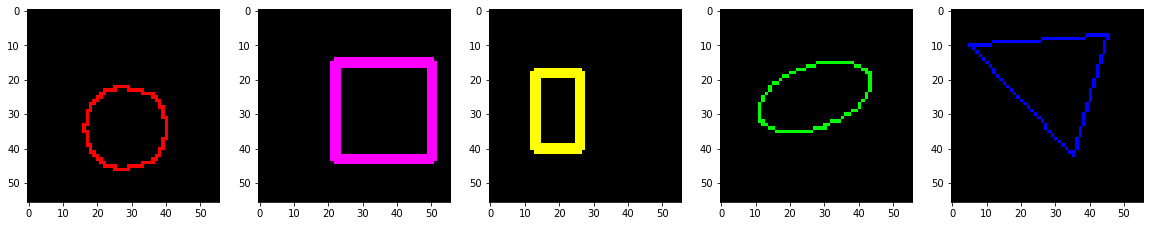

In [4]:
plot_img([
    generate_random_circle_obj(), generate_random_square_obj(), generate_random_rectangle_obj(),\
    generate_random_ellipse_obj(), generate_random_triangle_obj()
], figsize=(20, 10))

In [5]:
# generate mask data
circle_mask_data = generate_dataset(generate_random_circle_obj, num_elements)
square_mask_data = generate_dataset(generate_random_square_obj, num_elements)
rectangle_mask_data = generate_dataset(generate_random_rectangle_obj, num_elements)
ellipse_mask_data = generate_dataset(generate_random_ellipse_obj, num_elements)
triangle_mask_data = generate_dataset(generate_random_triangle_obj, num_elements)
# get mask
circle_coord_mask_list = get_coordinates_mask(circle_mask_data)
square_coord_mask_list = get_coordinates_mask(square_mask_data)
rectangle_coord_mask_list = get_coordinates_mask(rectangle_mask_data)
ellipse_coord_mask_list = get_coordinates_mask(ellipse_mask_data)
triangle_coord_mask_list = get_coordinates_mask(triangle_mask_data)

In [6]:
save_data(circle_mask_data, 'circle_mask_data.pickle.dat', folder_name='data')
save_data(square_mask_data, 'square_mask_data.pickle.dat', folder_name='data')
save_data(rectangle_mask_data, 'rectangle_mask_data.pickle.dat', folder_name='data')
save_data(ellipse_mask_data, 'ellipse_mask_data.pickle.dat', folder_name='data')
save_data(triangle_mask_data, 'triangle_mask_data.pickle.dat', folder_name='data')

save_data(circle_coord_mask_list, 'circle_coord_mask_list.pickle.dat', folder_name='data')
save_data(square_coord_mask_list, 'square_coord_mask_list.pickle.dat', folder_name='data')
save_data(rectangle_coord_mask_list, 'rectangle_coord_mask_list.pickle.dat', folder_name='data')
save_data(ellipse_coord_mask_list, 'ellipse_coord_mask_list.pickle.dat', folder_name='data')
save_data(triangle_coord_mask_list, 'triangle_coord_mask_list.pickle.dat', folder_name='data')

# Add background

In [7]:
# TODO

# Add extra pictures (MNIST + EMNIST)

In [8]:
# TODO
# MNIST -> Not used 0, 4
# EMNIST -> Not used 4->D, 15->O, 17->Q

# Create summary dataset

In [9]:
circle_mask_data = load_data('circle_mask_data.pickle.dat', folder_name='data')
square_mask_data = load_data('square_mask_data.pickle.dat', folder_name='data')
rectangle_mask_data = load_data('rectangle_mask_data.pickle.dat', folder_name='data')
ellipse_mask_data = load_data('ellipse_mask_data.pickle.dat', folder_name='data')
triangle_mask_data = load_data('triangle_mask_data.pickle.dat', folder_name='data')

circle_coord_mask_list = load_data('circle_coord_mask_list.pickle.dat', folder_name='data')
square_coord_mask_list = load_data('square_coord_mask_list.pickle.dat', folder_name='data')
rectangle_coord_mask_list = load_data('rectangle_coord_mask_list.pickle.dat', folder_name='data')
ellipse_coord_mask_list = load_data('ellipse_coord_mask_list.pickle.dat', folder_name='data')
triangle_coord_mask_list = load_data('triangle_coord_mask_list.pickle.dat', folder_name='data')

In [10]:
x_data_circle = generate_x_data_from_mask(circle_coord_mask_list)
x_data_square = generate_x_data_from_mask(square_coord_mask_list)
x_data_rectangle = generate_x_data_from_mask(rectangle_coord_mask_list)
x_data_ellipse = generate_x_data_from_mask(ellipse_coord_mask_list)
x_data_triangle = generate_x_data_from_mask(triangle_coord_mask_list)

del circle_coord_mask_list, square_coord_mask_list, rectangle_coord_mask_list,\
    ellipse_coord_mask_list, triangle_coord_mask_list

In [11]:
x_train_data_circle, x_test_data_circle = train_test_split_custom(x_data_circle, TEST_SIZE)
x_train_data_square, x_test_data_square = train_test_split_custom(x_data_square, TEST_SIZE)
x_train_data_rectangle, x_test_data_rectangle = train_test_split_custom(x_data_rectangle, TEST_SIZE)
x_train_data_ellipse, x_test_data_ellipse = train_test_split_custom(x_data_ellipse, TEST_SIZE)
x_train_data_triangle, x_test_data_triangle = train_test_split_custom(x_data_triangle, TEST_SIZE)
del x_data_circle, x_data_square, x_data_rectangle, x_data_ellipse, x_data_triangle

y_train_data_circle, y_test_data_circle = train_test_split_custom(circle_mask_data, TEST_SIZE)
y_train_data_square, y_test_data_square = train_test_split_custom(square_mask_data, TEST_SIZE)
y_train_data_rectangle, y_test_data_rectangle = train_test_split_custom(rectangle_mask_data, TEST_SIZE)
y_train_data_ellipse, y_test_data_ellipse = train_test_split_custom(ellipse_mask_data, TEST_SIZE)
y_train_data_triangle, y_test_data_triangle = train_test_split_custom(triangle_mask_data, TEST_SIZE)
del circle_mask_data, square_mask_data, rectangle_mask_data, ellipse_mask_data, triangle_mask_data

In [12]:
# x data
x_train = np.concatenate((
    x_train_data_circle, x_train_data_square, x_train_data_rectangle, x_train_data_ellipse, x_train_data_triangle
))
del x_train_data_circle, x_train_data_square, x_train_data_rectangle, x_train_data_ellipse, x_train_data_triangle
x_test = np.concatenate((
    x_test_data_circle, x_test_data_square, x_test_data_rectangle, x_test_data_ellipse, x_test_data_triangle
))
del x_test_data_circle, x_test_data_square, x_test_data_rectangle, x_test_data_ellipse, x_test_data_triangle
# y data
y_train = np.concatenate((
    y_train_data_circle, y_train_data_square, y_train_data_rectangle, y_train_data_ellipse, y_train_data_triangle
))
del y_train_data_circle, y_train_data_square, y_train_data_rectangle, y_train_data_ellipse, y_train_data_triangle
y_test = np.concatenate((
    y_test_data_circle, y_test_data_square, y_test_data_rectangle, y_test_data_ellipse, y_test_data_triangle
))
del y_test_data_circle, y_test_data_square, y_test_data_rectangle, y_test_data_ellipse, y_test_data_triangle

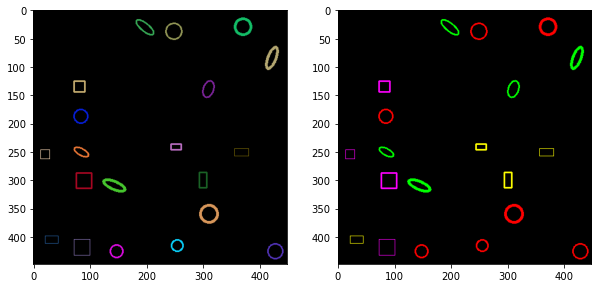

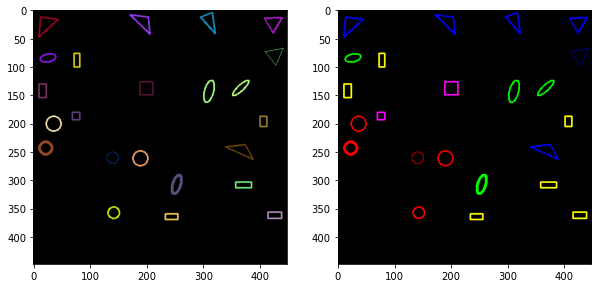

In [13]:
# add empty cells
x_train = add_white_elements(x_train)
x_test = add_white_elements(x_test)
y_train = add_white_elements(y_train)
y_test = add_white_elements(y_test)
# shuffle it
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)
# create big image
x_train, y_train = create_data_64(x_train), create_data_64(y_train)
x_test, y_test = create_data_64(x_test), create_data_64(y_test)
plot_img([x_train[0], y_train[0]], figsize=(10, 20))
plot_img([x_test[0], y_test[0]], figsize=(10, 20))

In [14]:
mode = 'train'
directory = f"./data/{mode}_batch" 
if not os.path.exists(directory):
    os.mkdir(directory)

for i in range(x_train.shape[0]):
    save_data(x_train[i], f'img_{mode}_batch_{i + 1}', directory)
    save_data(y_train[i], f'mask_{mode}_batch_{i + 1}', directory)

mode = 'test'
directory = f"./data/{mode}_batch" 
if not os.path.exists(directory):
    os.mkdir(directory)
for i in range(x_test.shape[0]):
    save_data(x_test[i], f'img_{mode}_batch_{i + 1}', directory)
    save_data(y_test[i], f'mask_{mode}_batch_{i + 1}', directory)

print(f"Train dataset size: {x_train.shape}")
print(f"Test dataset size: {x_test.shape}")
n_train_elements = x_train.shape[0]
n_test_elements = x_test.shape[0]

del x_train, y_train, x_test, y_test

Train dataset size: (56, 448, 448, 3)
Test dataset size: (14, 448, 448, 3)


In [15]:
n_train_elements = 56
n_test_elements = 14

# Construct model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   784         ['input_1[0][0]']                
                                28)                                                               
                                                                                                  
 activation (Activation)        (None, None, None,   0           ['conv2d[0][0]']                 
                                28)                                                           

                                                                                                  
 up_sampling2d_1 (UpSampling2D)  (None, None, None,   0          ['activation_9[0][0]']           
                                224)                                                              
                                                                                                  
 concatenate_1 (Concatenate)    (None, None, None,   0           ['activation_5[0][0]',           
                                336)                              'up_sampling2d_1[0][0]']        
                                                                                                  
 conv2d_10 (Conv2D)             (None, None, None,   338800      ['concatenate_1[0][0]']          
                                112)                                                              
                                                                                                  
 activatio

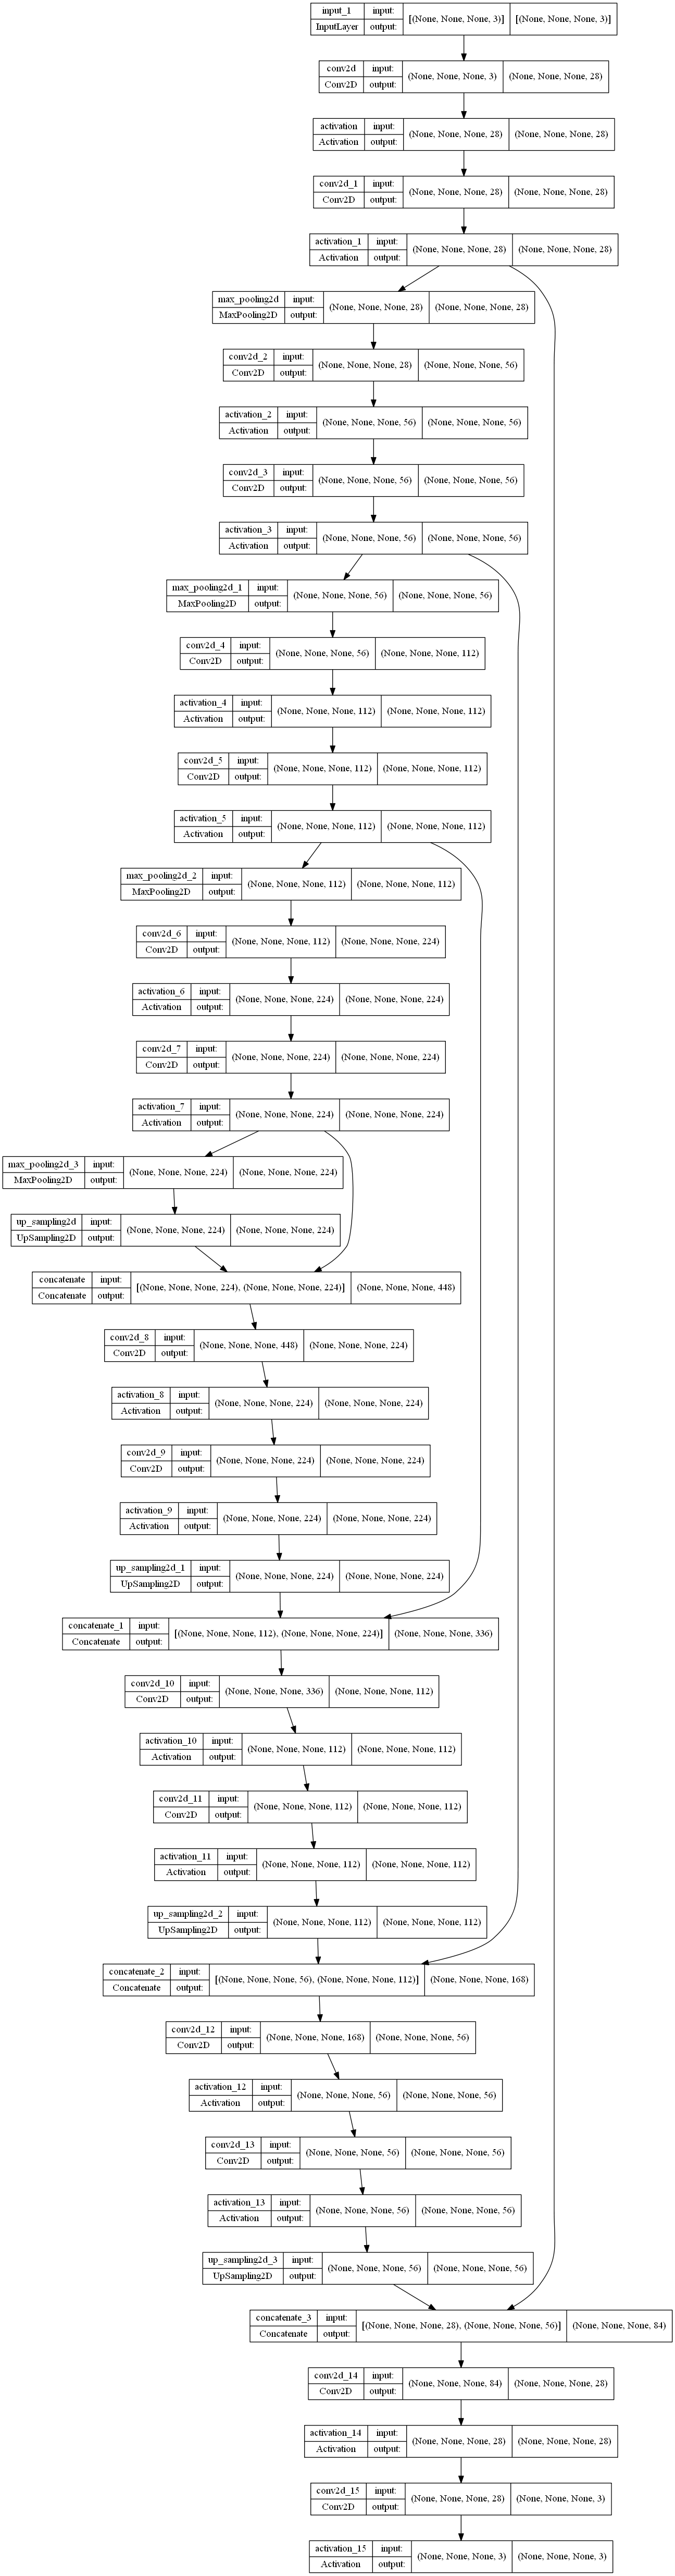

In [16]:
model = get_unet_model()
model.compile(Adam(), loss=dice_coef_loss, metrics=[dice_coef_train])
print(model.summary())

directory = './artifacts' 
if not os.path.exists(directory):
    os.mkdir(directory)
plot_model(model, to_file=f'{directory}/model.png', show_shapes=True)

# Train model

In [17]:
directory = './models' 
if not os.path.exists(directory):
    os.mkdir(directory)

best_w = ModelCheckpoint(
    directory + "/fcn_best-{epoch:02d}.h5",
    monitor='val_loss',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch'
)

epochs = 1# 20
batch_size = 10#50

model.fit_generator(
    keras_generator('train', batch_size),
    steps_per_epoch=n_train_elements // batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=[best_w],
    validation_data=keras_generator('test', batch_size),
    validation_steps=n_test_elements // batch_size,
    class_weight=None,
    workers=1,
    use_multiprocessing=False,
    shuffle=True,
    initial_epoch=0
)

5/5 [==============================] - 120s 26s/step - loss: 0.9596 - dice_coef_train: 0.0404 - val_loss: 0.9382 - val_dice_coef_train: 0.0618


# Show test results

In [18]:
mode = 'test'
num = 1
prefix_path = f'data/{mode}_batch'
x = load_data(f'img_{mode}_batch_{num}', folder_name=prefix_path)
y = load_data(f'mask_{mode}_batch_{num}', folder_name=prefix_path)

fcn_best-01.h5


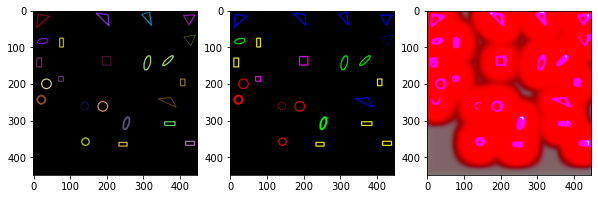

accuracy_metric value: 0.5404924665178571
multi_accuracy_metric value: 0.540211787840136
iou_metric value: 0.02208268642425537
dice_coef value: 0.044160790741443634


In [19]:
for model_name in os.listdir(model_path_prefix):
    print(model_name)
    model = load_model(
        f"{model_path_prefix}\\{model_name}",
        custom_objects=
        {
            'dice_coef_loss': dice_coef_loss, 
            'dice_coef_train': [dice_coef_train]
        }
    )
    get_model_predict_result(x, y, model, print_metrics=True)

1


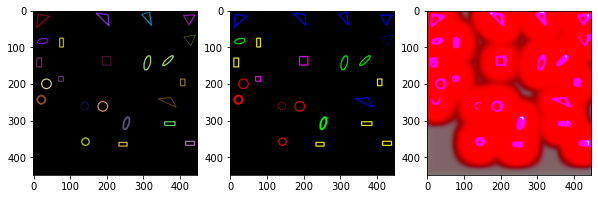

accuracy_metric value: 0.5404924665178571
multi_accuracy_metric value: 0.540211787840136
iou_metric value: 0.02208268642425537
dice_coef value: 0.044160790741443634
2


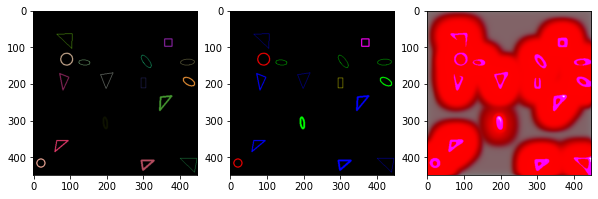

accuracy_metric value: 0.43317190157312924
multi_accuracy_metric value: 0.43265704719387754
iou_metric value: 0.014069171622395515
dice_coef value: 0.02813366800546646
3


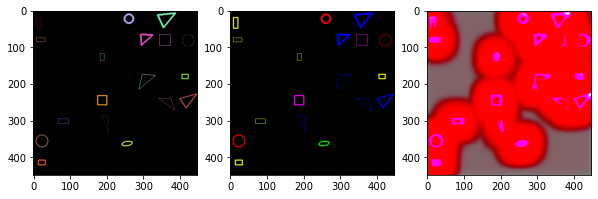

accuracy_metric value: 0.44472955197704084
multi_accuracy_metric value: 0.44441897852891155
iou_metric value: 0.018685899674892426
dice_coef value: 0.03736727312207222
4


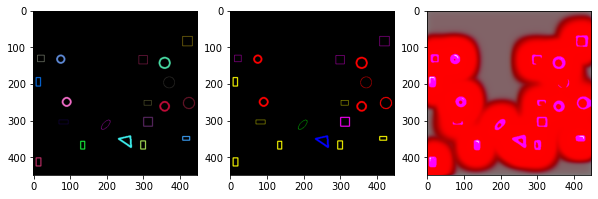

accuracy_metric value: 0.44383436968537415
multi_accuracy_metric value: 0.4434839365433674
iou_metric value: 0.021151645109057426
dice_coef value: 0.04229877144098282
5


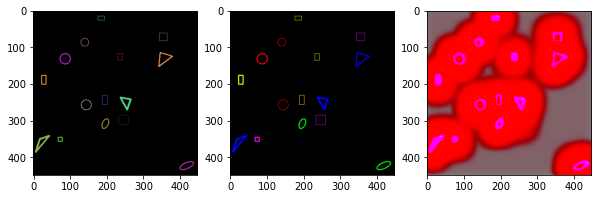

accuracy_metric value: 0.4116908482142857
multi_accuracy_metric value: 0.4116327194940476
iou_metric value: 0.012694727629423141
dice_coef value: 0.02538486383855343
6


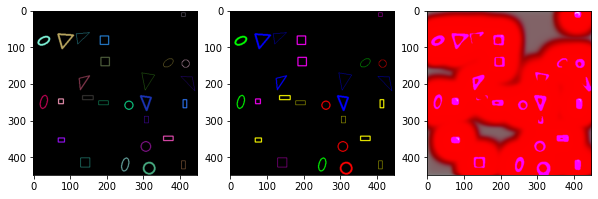

accuracy_metric value: 0.5511499521683674
multi_accuracy_metric value: 0.5509041507227891
iou_metric value: 0.02431195229291916
dice_coef value: 0.04861929640173912
7


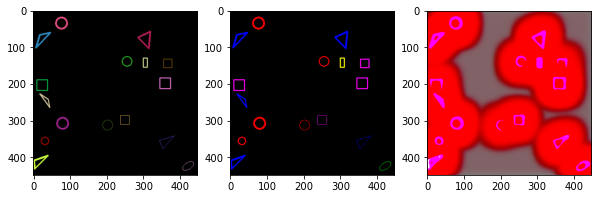

accuracy_metric value: 0.426312712585034
multi_accuracy_metric value: 0.4261947943239796
iou_metric value: 0.025152085348963737
dice_coef value: 0.05029961094260216
8


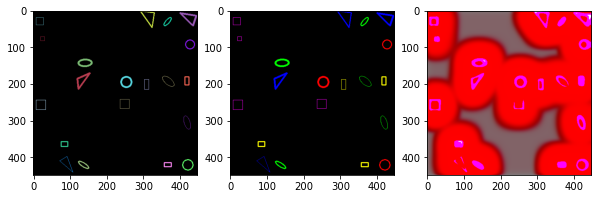

accuracy_metric value: 0.46069169855442177
multi_accuracy_metric value: 0.4605189732142857
iou_metric value: 0.016979627311229706
dice_coef value: 0.03395466506481171
9


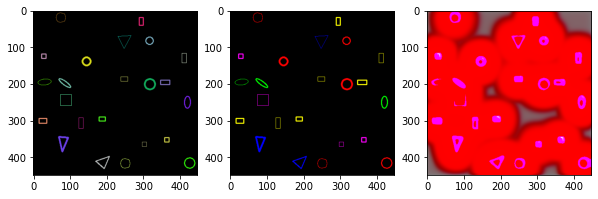

accuracy_metric value: 0.5653167517006803
multi_accuracy_metric value: 0.5651938509778912
iou_metric value: 0.01971653662621975
dice_coef value: 0.039428383111953735


In [20]:
mode = 'test'
prefix_path = f'data\\{mode}_batch'
model = load_model(
        f'{model_path_prefix}\\fcn_best-01.h5',
        custom_objects=
        {
            'dice_coef_loss': dice_coef_loss, 
            'dice_coef_train': [dice_coef_train]
        }
)
for num in [i for i in range(1, 10)]:
    print(num)
    x = load_data(f'img_{mode}_batch_{num}', folder_name=prefix_path)
    y = load_data(f'mask_{mode}_batch_{num}', folder_name=prefix_path)
    get_model_predict_result(x, y, model, print_metrics=True)

In [21]:
mode = 'train'
num = 1
prefix_path = f'data\\{mode}_batch'
x = load_data(f'img_{mode}_batch_{num}', folder_name=prefix_path)
y = load_data(f'mask_{mode}_batch_{num}', folder_name=prefix_path)

fcn_best-01.h5


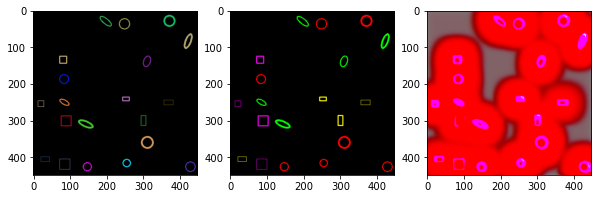

accuracy_metric value: 0.5123548442814626
multi_accuracy_metric value: 0.5121007387329932
iou_metric value: 0.01794094406068325
dice_coef value: 0.03587724268436432


In [22]:
for model_name in os.listdir(model_path_prefix):
    print(model_name)
    get_model_predict_result(x, y, model, print_metrics=True)
    model = load_model(
        f"{model_path_prefix}\\{model_name}",
        custom_objects=
        {
            'dice_coef_loss': dice_coef_loss, 
            'dice_coef_train': [dice_coef_train]
        }
    )

1


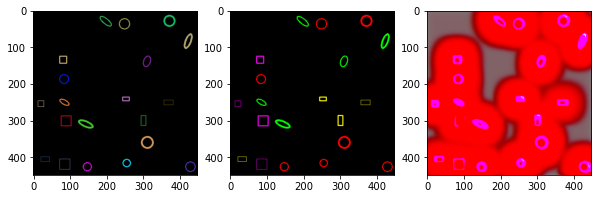

accuracy_metric value: 0.5123548442814626
multi_accuracy_metric value: 0.5121007387329932
iou_metric value: 0.01794094406068325
dice_coef value: 0.03587724268436432
2


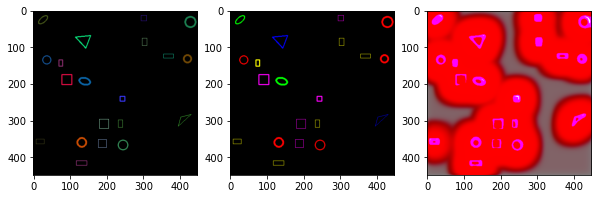

accuracy_metric value: 0.468642046662415
multi_accuracy_metric value: 0.46841617506377553
iou_metric value: 0.01798194833099842
dice_coef value: 0.035959240049123764
3


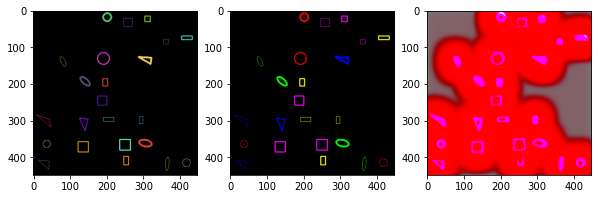

accuracy_metric value: 0.49879922672193877
multi_accuracy_metric value: 0.4986314838435374
iou_metric value: 0.02251664362847805
dice_coef value: 0.04502878338098526
4


accuracy_metric value: 0.37748126594387754
multi_accuracy_metric value: 0.37729027157738093
iou_metric value: 0.016477596014738083
dice_coef value: 0.03295079246163368
5


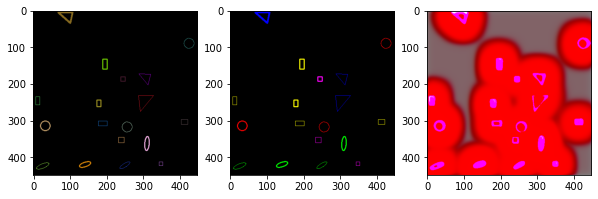

accuracy_metric value: 0.42975393282312924
multi_accuracy_metric value: 0.4295396869685374
iou_metric value: 0.010719617828726768
dice_coef value: 0.02143462933599949
6


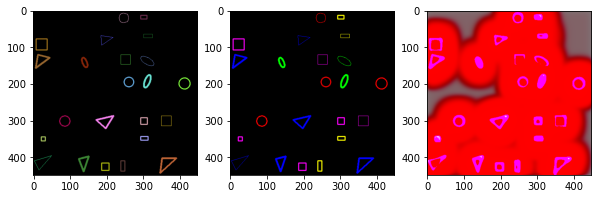

accuracy_metric value: 0.5402848639455783
multi_accuracy_metric value: 0.54006729644983
iou_metric value: 0.02819531410932541
dice_coef value: 0.05638608708977699
7


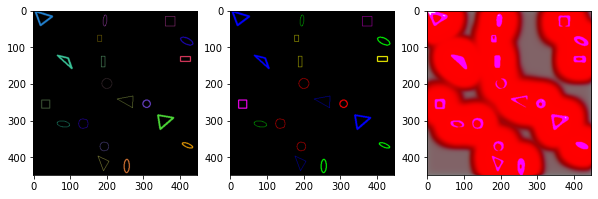

accuracy_metric value: 0.4902493223852041
multi_accuracy_metric value: 0.4901762462797619
iou_metric value: 0.01662229187786579
dice_coef value: 0.03323989734053612
8


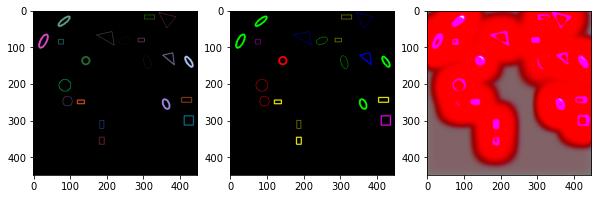

accuracy_metric value: 0.4257480335884354
multi_accuracy_metric value: 0.42554541347789115
iou_metric value: 0.011767382733523846
dice_coef value: 0.023530272766947746
9


accuracy_metric value: 0.5630995562287415
multi_accuracy_metric value: 0.5628371465773809
iou_metric value: 0.02500768005847931
dice_coef value: 0.0500108040869236


In [23]:
mode = 'train'
prefix_path = f'data\\{mode}_batch'
model = load_model(
        f'{model_path_prefix}\\fcn_best-01.h5',
        custom_objects=
        {
            'dice_coef_loss': dice_coef_loss, 
            'dice_coef_train': [dice_coef_train]
        }
)
for num in [i for i in range(1, 10)]:
    print(num)
    x = load_data(f'img_{mode}_batch_{num}', folder_name=prefix_path)
    y = load_data(f'mask_{mode}_batch_{num}', folder_name=prefix_path)
    get_model_predict_result(x, y, model, print_metrics=True)

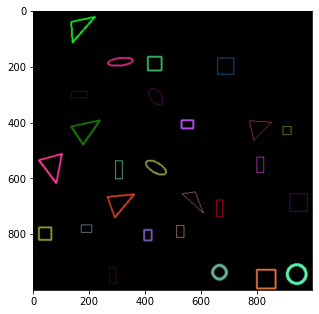

In [24]:
x = x.astype('float32')
resized = cv2.resize(x, (1000, 1000), interpolation=cv2.INTER_LINEAR).astype('int')
plot_img([resized])